# Import The Libraries 

In [245]:
#pip install git+https://github.com/pydata/pandas-datareader.git

In [246]:
#Data Manipulation 
#==========================================
import pandas as pd 
import pandas_datareader as pdr 
import numpy as np  
import yfinance as yf
#Data Visualization 
#==========================================
import matplotlib.pyplot as plt 
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
#Date Time 
#==========================================
from datetime import datetime 
from datetime import timedelta
#Statistic (Arima)
#==========================================
import statsmodels.api as sms
#Adfuller
#==========================================
from statsmodels.tsa.stattools import adfuller
#ARIMA
#==========================================
from statsmodels.tsa.arima.model import ARIMA
#SARIMAX
#==========================================
from statsmodels.tsa.statespace.sarimax import SARIMAX
#Warnings 
#==========================================
import warnings 
warnings.filterwarnings('ignore')

### Read The Data 

In [247]:
df_tesla = yf.download('TSLA')

[*********************100%%**********************]  1 of 1 completed


In [248]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [249]:
df_tesla

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500
...,...,...,...,...,...,...
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100
2024-07-01,201.020004,213.229996,200.850006,209.860001,209.860001,135691400


### Simple Moving Avg 

<Axes: xlabel='Date'>

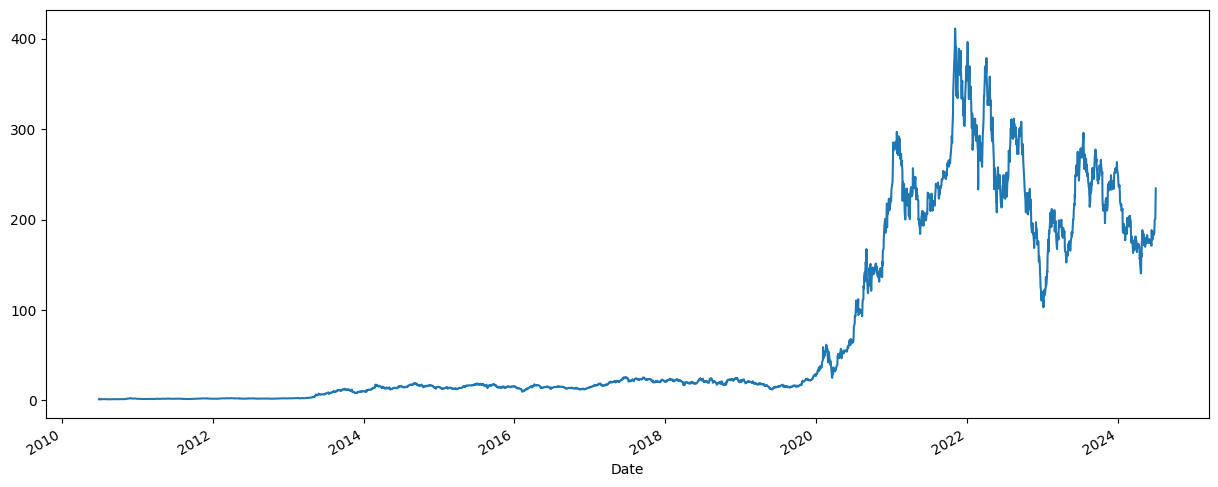

In [250]:
df_tesla['Open'].plot(figsize=(15,6))

In [251]:
df_tesla['open:10 days rolling']=df_tesla['Open'].rolling(10,min_periods=1).mean()

<Axes: xlabel='Date'>

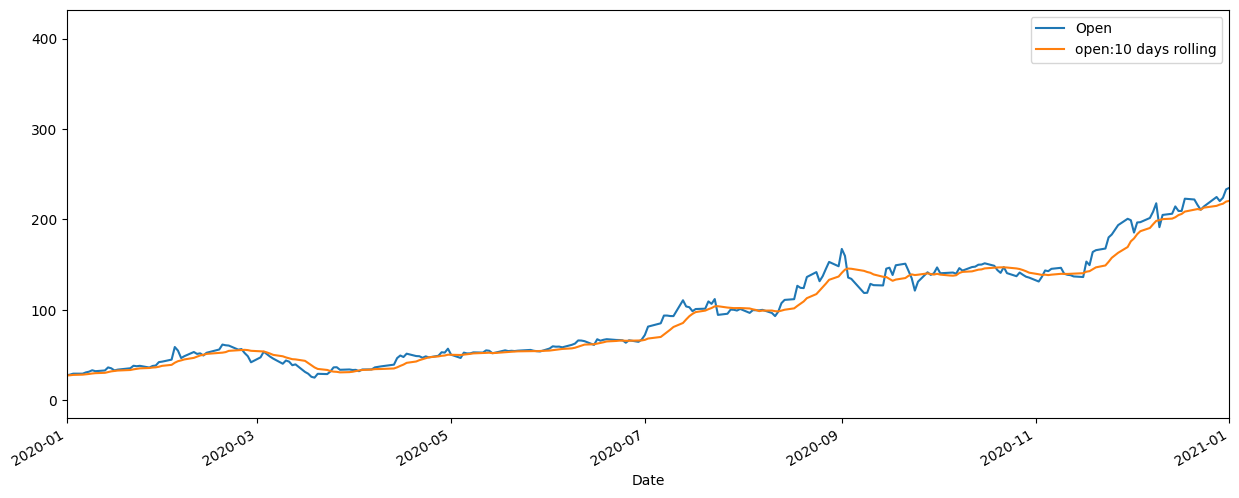

In [252]:
df_tesla[['Open','open:10 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [253]:
df_tesla['open:30 days rolling']=df_tesla['Open'].rolling(30,min_periods=1).mean()
df_tesla['open:50 days rolling']=df_tesla['Open'].rolling(50,min_periods=1).mean()

<Axes: xlabel='Date'>

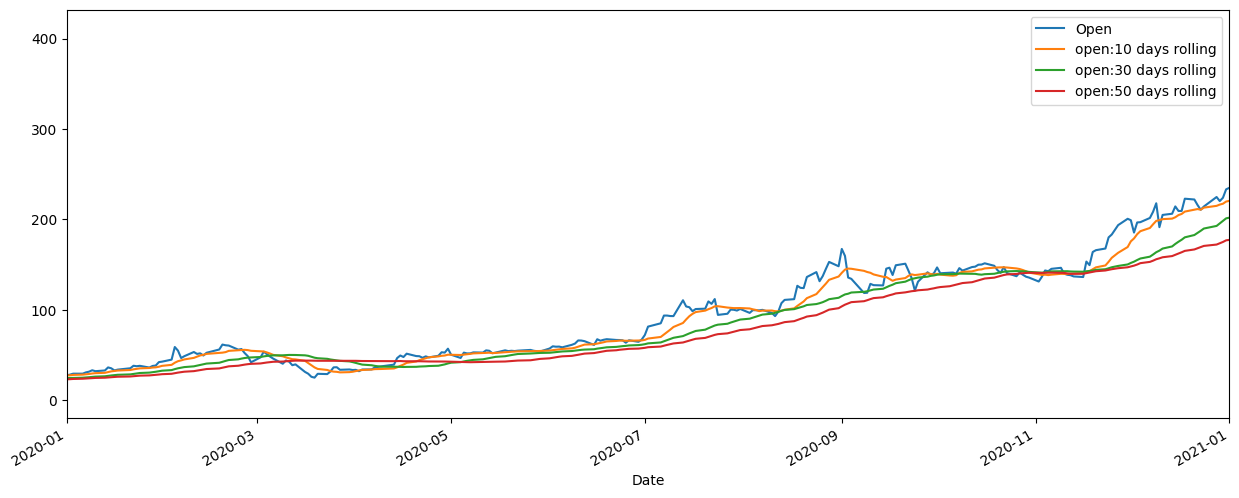

In [254]:
df_tesla[['Open','open:10 days rolling','open:30 days rolling','open:50 days rolling']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

### Cummulative Moving Average 

<Axes: xlabel='Date'>

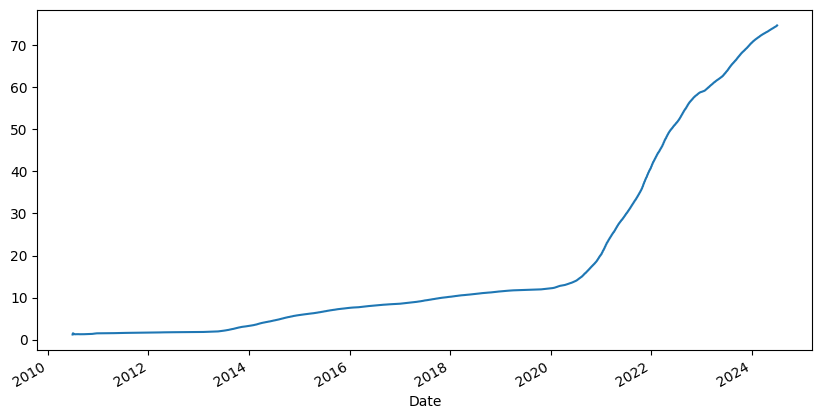

In [255]:
## Using Expanding 
df_tesla['Open'].expanding().mean().plot(figsize=(10,5))

### EMA - Exponential  Moving Avg 

In [256]:
df_tesla['EMA_01']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

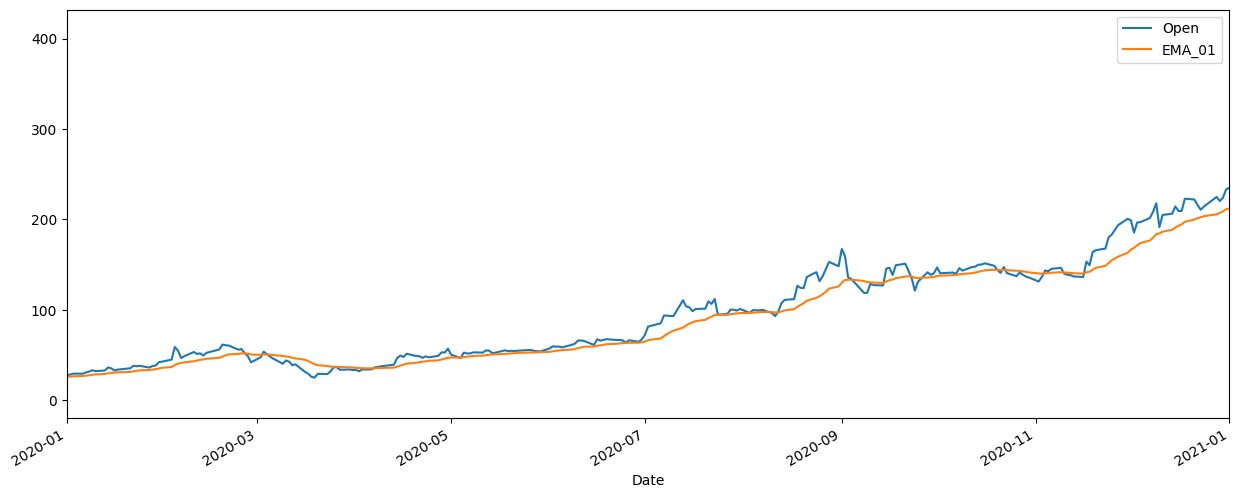

In [257]:
df_tesla[['Open','EMA_01']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

In [258]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()

<Axes: xlabel='Date'>

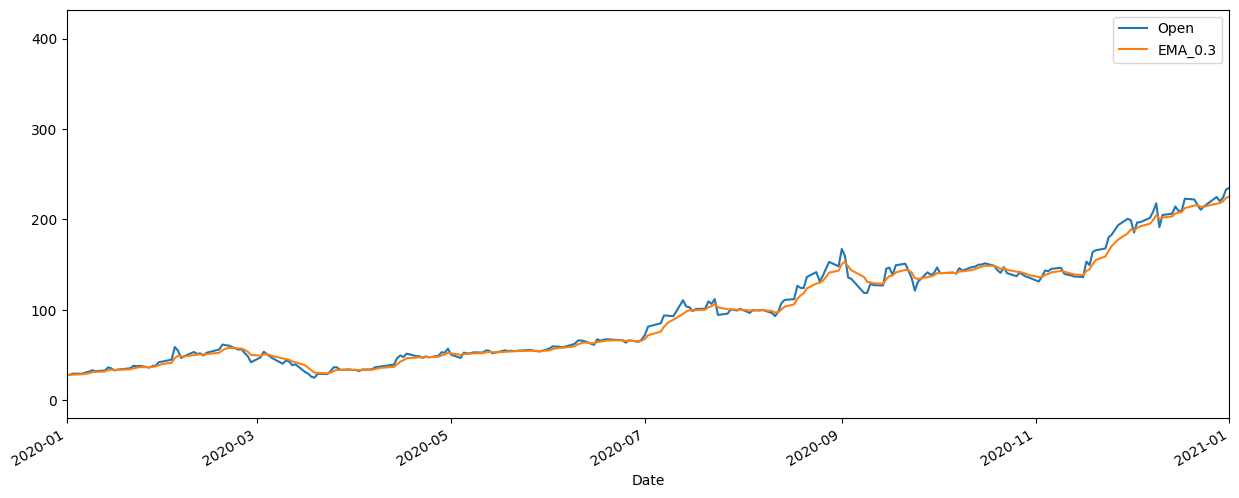

In [259]:
df_tesla[['Open','EMA_0.3']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(15,6))

## EWMA  : Exponential Weight  Moving Avg 

In [260]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5).mean()

<Axes: xlabel='Date'>

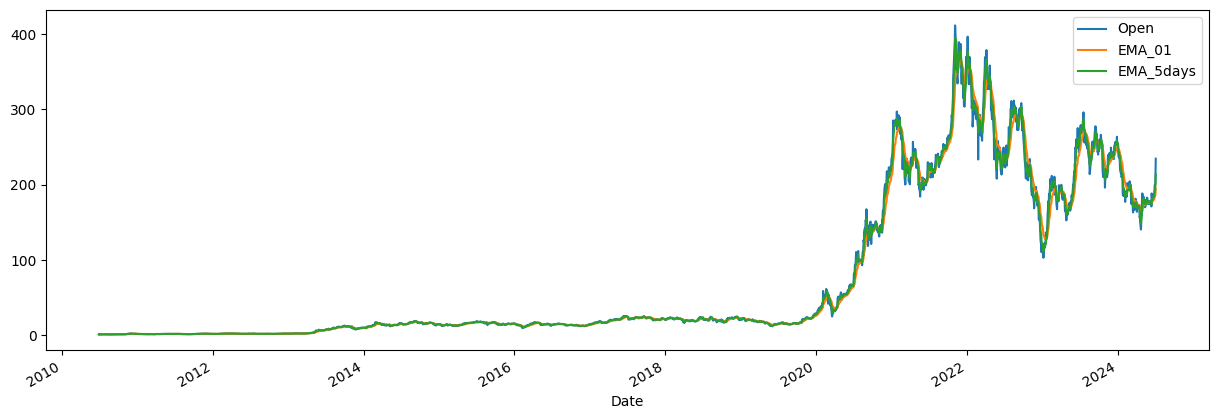

In [261]:
df_tesla[['Open','EMA_01','EMA_5days']].plot(figsize=(15,5))

### States Models (Arma + Arima )

In [262]:
df_airline=pd.read_csv('airline_passengers.csv')

In [263]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [264]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [265]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [266]:
df_airline.dropna(axis=0,inplace=True)

In [267]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [268]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [269]:
df_airline['Month']=pd.to_datetime(df_airline['Month'])

In [270]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [271]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [272]:
df_airline.set_index('Month',inplace=True)

In [273]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

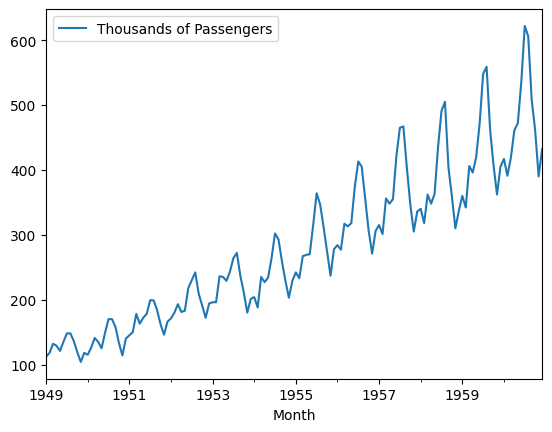

In [274]:
df_airline.plot()

In [275]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics :{}'.format(result[0]))
    print('P-Value: {}'.format(result[1]))
    if result[1]<=0.05:
        print("Strong evidence Against The Null Hypothesis , Reject The Null Hypothesis, Data has no unit root and is stationary")
    else:
        print("Weak evidence Against null Hypothesis , time series has a unit root, indicating it is non-stationary")

In [276]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics :0.8153688792060547
P-Value: 0.9918802434376411
Weak evidence Against null Hypothesis , time series has a unit root, indicating it is non-stationary


In [277]:
### Using Differencing 
df_airline['Passengers First Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [278]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [279]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics :-2.829266824170004
P-Value: 0.05421329028382491
Weak evidence Against null Hypothesis , time series has a unit root, indicating it is non-stationary


In [280]:
### Using Techniques Differencing 
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [281]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics :-16.38423154246853
P-Value: 2.732891850014085e-29
Strong evidence Against The Null Hypothesis , Reject The Null Hypothesis, Data has no unit root and is stationary


In [282]:
### In seasonal Data i should use 12 months (we do it for whole Year)
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)

In [283]:
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics :-3.3830207264924814
P-Value: 0.011551493085514954
Strong evidence Against The Null Hypothesis , Reject The Null Hypothesis, Data has no unit root and is stationary


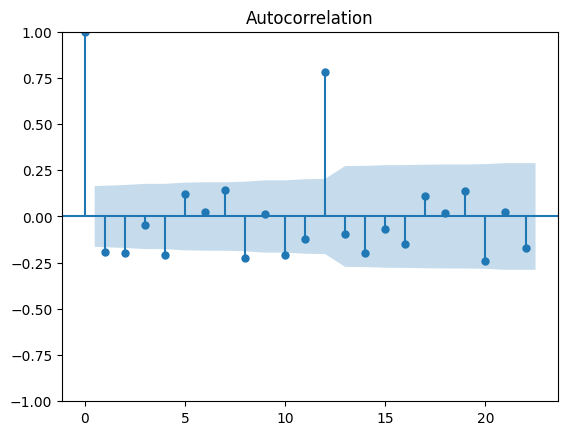

In [284]:
### Person Correlation That we use here  For MA
acf=plot_acf(df_airline['Passengers Second Difference'].dropna())

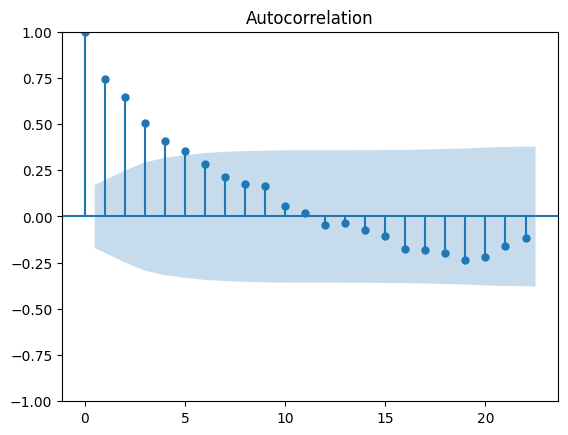

In [285]:
## q=5  First one Doesnt Count 
acf_12=plot_acf(df_airline['Passengers 12 Difference'].dropna())

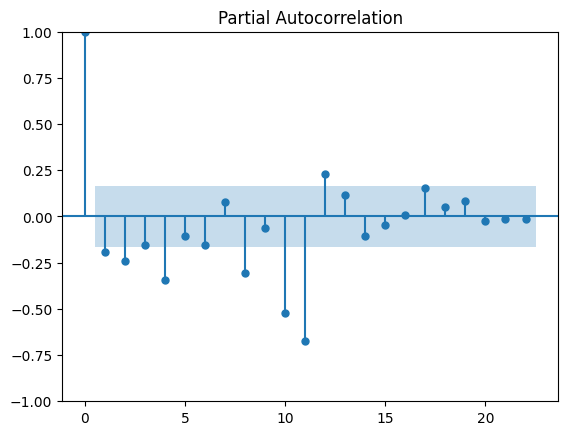

In [286]:
## For (AR)
result=plot_pacf(df_airline['Passengers Second Difference'].dropna())

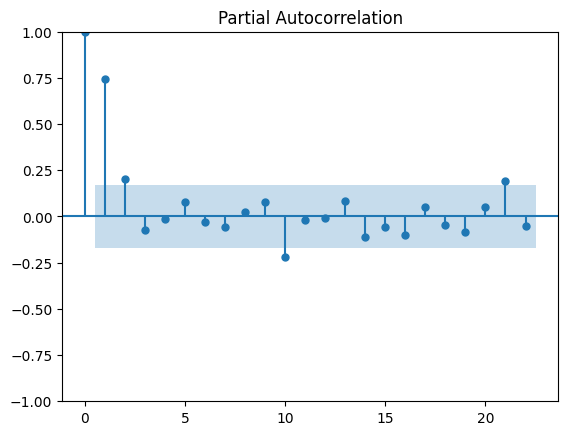

In [287]:
Pacf12=plot_pacf(df_airline['Passengers 12 Difference'].dropna())

### Split The Data Into Train And Test 


In [288]:
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [289]:
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)


In [290]:
train_data=df_airline[:train_dataset_end]
test_data=df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

### Prediction 

In [291]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [292]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


###  Create Arima 

In [293]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [294]:
model_ARIMA=ARIMA(train_data['Thousands of Passengers'],order=(10,2,12))

In [295]:
model_arima_fit=model_ARIMA.fit()

In [296]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -307.734
Date:                     Fri, 05 Jul 2024   AIC                            661.467
Time:                             04:12:02   BIC                            716.822
Sample:                         01-01-1949   HQIC                           683.691
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0468      0.115      0.408      0.683      -0.178       0.271
ar.L2         -1.0429      0.084    -12.484      0.000      -1.207      -0.879
ar.L3          0.0886      0.139      0.638      0.523      -0.183       0.360
ar.L4         -1.0258      0.131     -7.829      0.000      -1.283      -0.769
ar.L5          0.0657      0.155      0.423      0.672      -0.239       0.370
ar.L6         -0.9860      0.143     -6.881      0.000      -1.267      -0.705
ar.L7          0.0175      0.142      0.123      0.902      -0.261       0.296
ar.L8         -0.9822      0.122     -8.025      0.000      -1.222      -0.742
ar.L9         -0.0069      0.095     -0.073      0.942      -0.193       0.179
ar.L10        -0.9389      0.085    -11.089      0.000      -1.105      -0.773
ma.L1         -1.2855      0.254     -5.058      0.000      -1.784      -0.787
ma.L2          1.2392      0.359      3.456      0.001       0.536       1.942
ma.L3         -1.4412      0.436     -3.303      0.001      -2.296      -0.586
ma.L4          1.3756      0.507      2.715      0.007       0.382       2.369
ma.L5         -1.2160      0.574     -2.117      0.034      -2.342      -0.090
ma.L6          1.0827      0.660      1.640      0.101      -0.211       2.376
ma.L7         -1.0698      0.715     -1.497      0.134      -2.471       0.331
ma.L8          0.8857      0.819      1.082      0.279      -0.719       2.491
ma.L9         -0.7849      0.737     -1.066      0.287      -2.229       0.659
ma.L10         0.5230      0.601      0.870      0.384      -0.656       1.702
ma.L11        -0.4130      0.455     -0.908      0.364      -1.304       0.478
ma.L12         0.1336      0.273      0.489      0.625      -0.402       0.669
sigma2        77.2424     16.209      4.765      0.000      45.473     109.011
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.73
Prob(Q):                              0.99   Prob(JB):                         0.09
Heteroskedasticity (H):               2.12   Skew:                             0.59
Prob(H) (two-sided):                  0.06   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [297]:
### Prediction 
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [298]:
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [299]:
pred=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred

In [300]:
residuals

Month
1956-01-01      0.752151
1956-02-01      7.486060
1956-03-01     21.817993
1956-04-01     14.412625
1956-05-01     18.896674
1956-06-01     28.641807
1956-07-01     24.514025
1956-08-01     33.111867
1956-09-01     14.918434
1956-10-01      3.098013
1956-11-01     -0.806768
1956-12-01      3.371034
1957-01-01      3.918047
1957-02-01      7.198960
1957-03-01     39.045239
1957-04-01     23.486480
1957-05-01     28.894083
1957-06-01     49.295744
1957-07-01     50.443150
1957-08-01     70.449795
1957-09-01     38.713132
1957-10-01     14.770778
1957-11-01      2.487448
1957-12-01      6.541608
1958-01-01      1.454312
1958-02-01     -0.389005
1958-03-01     23.060549
1958-04-01     -2.513892
1958-05-01      9.765078
1958-06-01     35.424123
1958-07-01     50.509133
1958-08-01     83.707204
1958-09-01     13.338948
1958-10-01     -2.585237
1958-11-01    -23.174035
1958-12-01    -19.292262
1959-01-01     -5.693433
1959-02-01     -1.248857
1959-03-01     44.831980
1959-04-01     19.4

<Axes: ylabel='Density'>

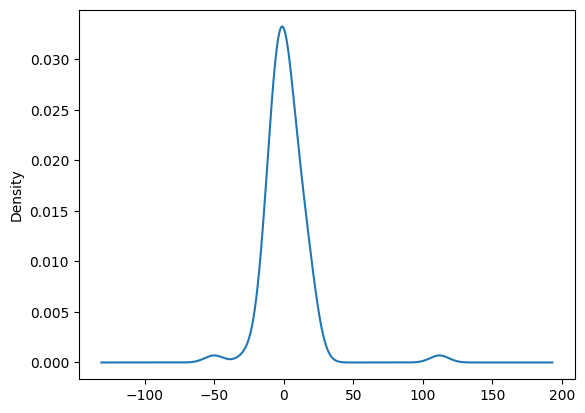

In [301]:
model_arima_fit.resid.plot(kind='kde')

In [302]:
test_data['Predicted_ARIMA']=pred

<Axes: xlabel='Month'>

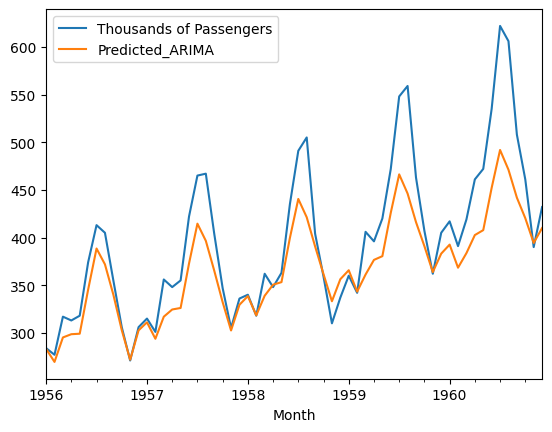

In [303]:
test_data[['Thousands of Passengers','Predicted_ARIMA']].plot()

### Sarimax Model 

In [304]:
SARI_MAX=SARIMAX(train_data['Thousands of Passengers'],order=(3,0,5),seasonal_order=(0,1,0,12))

In [305]:
model_sarima_fit=SARI_MAX.fit()

In [306]:
model_sarima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.241
Date:                             Fri, 05 Jul 2024   AIC                            548.481
Time:                                     04:12:03   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.639
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6003      0.940      0.639      0.523      -1.242       2.442
ar.L2          0.8316      0.233      3.574      0.000       0.376       1.288
ar.L3         -0.4549      0.896     -0.508      0.612      -2.212       1.302
ma.L1          0.1817      1.181      0.154      0.878      -2.133       2.496
ma.L2         -0.5365      1.281     -0.419      0.675      -3.046       1.973
ma.L3         -0.0985      0.390     -0.253      0.801      -0.863       0.666
ma.L4         -0.1269      0.344     -0.369      0.712      -0.802       0.548
ma.L5          0.2472      0.361      0.685      0.494      -0.460       0.955
sigma2        87.6976     82.993      1.057      0.291     -74.966     250.361
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [307]:
### Prediction 
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [308]:
pred_sarima=model_arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Thousands of Passengers']-pred_sarima

<Axes: xlabel='Month'>

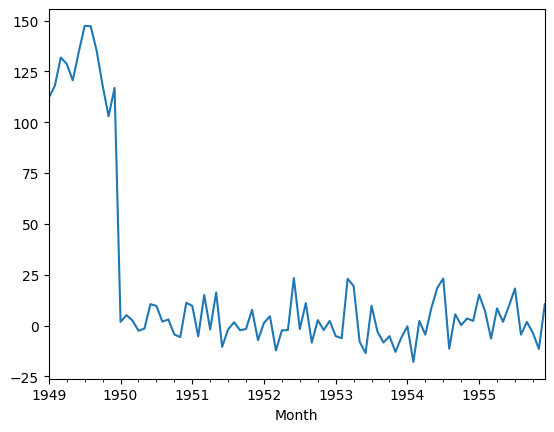

In [309]:
model_sarima_fit.resid.plot()

<Axes: ylabel='Density'>

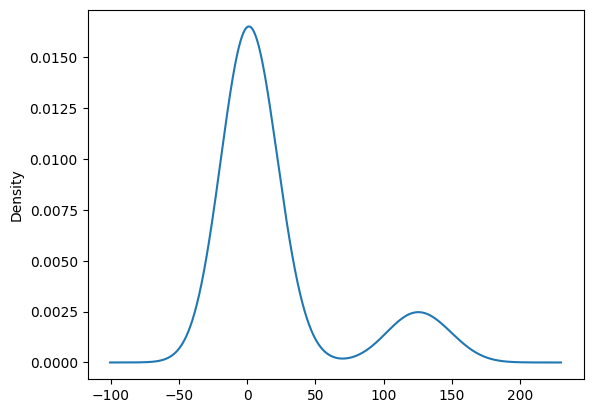

In [310]:
model_sarima_fit.resid.plot(kind='kde')

In [311]:
test_data['Predicted_SARIMA']=pred_sarima

In [312]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMA
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,283.247849,283.247849
1956-02-01,277.0,-7.0,-13.0,44.0,269.513940,269.513940
1956-03-01,317.0,40.0,47.0,50.0,295.182007,295.182007
1956-04-01,313.0,-4.0,-44.0,44.0,298.587375,298.587375
1956-05-01,318.0,5.0,9.0,48.0,299.103326,299.103326
1956-06-01,374.0,56.0,51.0,59.0,345.358193,345.358193
1956-07-01,413.0,39.0,-17.0,49.0,388.485975,388.485975
1956-08-01,405.0,-8.0,-47.0,58.0,371.888133,371.888133
1956-09-01,355.0,-50.0,-42.0,43.0,340.081566,340.081566


<Axes: xlabel='Month'>

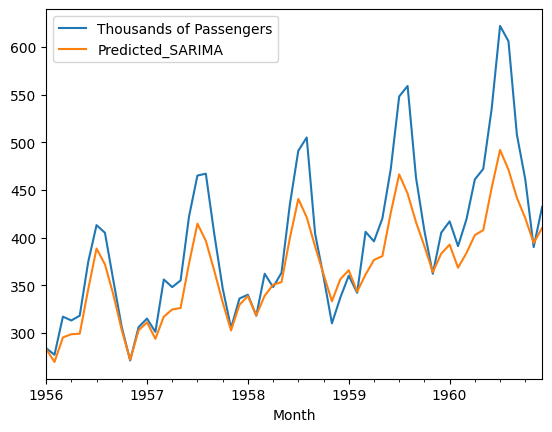

In [313]:
test_data[['Thousands of Passengers','Predicted_SARIMA']].plot()

In [314]:
## Arima is Best For Stock Not IN Seasonal data , For seasonal Data use SArima 